# Automata Project File

I have labelled each of the updates taken by the date it was applied along with some descriptions of what is happening in the code cell. The attachment of dates should allow for easy access to this file coming from the logbook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 10/02/21

In [2]:
def update(arr):
    """Updates the values in the array according to the set of rules
    Inputs:
    arr: input array
    Returns:
    arr_updated
    """
    N = np.size(arr)
    arr_updated = np.copy(arr)
    
    #looping over all cells in arr
    for i in range(N):
        
        #sum of surrounding
        sum = np.roll(arr,1)[i] + arr[i] + np.roll(arr,-1)[i]
        
        #rules
        if sum == 3:
            val = 0
        elif sum == 2:
            val = 1
        elif sum == 1:
            val = 0
        else:
            val = 0
        
        arr_updated[i] = val
    
    return arr_updated

In [3]:
#single array testing
arr = np.array([0,1,1,0,1,1,1,0,0,1])

print('Before',arr)
print('After ',update(arr))

Before [0 1 1 0 1 1 1 0 0 1]
After  [1 1 1 1 1 0 1 0 0 0]


### 13/02/21

In [4]:
def update1(arr,rules):
    """Updates the values in the array according to the set of inputted rules
    Inputs:
    arr: input array
    rules: defines rules, binary array (outcomes of rules for 3,2,1,0)
    Returns:
    arr_updated
    """
    N = np.size(arr)
    arr_updated = np.copy(arr)
    
    #looping over all cells in arr
    for i in range(N):
        
        #sum of surrounding
        sum = np.roll(arr,1)[i] + arr[i] + np.roll(arr,-1)[i]
        
        #rules
        if sum == 3:
            val = rules[3]
        elif sum == 2:
            val = rules[2]
        elif sum == 1:
            val = rules[1]
        else:
            val = rules[0]
        
        arr_updated[i] = val
    
    return arr_updated

In [5]:
#sets of rules
rule1 = np.array([0,0,0,0])
rule2 = np.array([1,0,0,0])
rule3 = np.array([0,1,0,0])
rule4 = np.array([0,0,1,0])
rule5 = np.array([0,0,0,1])
rule6 = np.array([1,1,0,0])
rule7 = np.array([1,0,1,0])
rule8 = np.array([1,0,0,1])
rule9 = np.array([0,1,1,0])
rule10 = np.array([0,1,0,1])
rule11 = np.array([0,0,1,1])
rule12 = np.array([1,1,1,0])
rule13 = np.array([1,1,0,1])
rule14 = np.array([0,1,1,1])
rule15 = np.array([1,0,1,1])
rule16 = np.array([1,1,1,1])



#testing over all possibilities
arr1 = np.array([0,0,1])


#printing
print(update1(arr1,rule1))
print(update1(arr1,rule2))
print(update1(arr1,rule3))
print(update1(arr1,rule4))
print(update1(arr1,rule5))
print(update1(arr1,rule6))
print(update1(arr1,rule7))
print(update1(arr1,rule8))
print(update1(arr1,rule9))
print(update1(arr1,rule10))
print(update1(arr1,rule11))
print(update1(arr1,rule12))
print(update1(arr1,rule13))
print(update1(arr1,rule14))
print(update1(arr1,rule15))
print(update1(arr1,rule16))

[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[1 1 1]
[0 0 0]
[0 0 0]
[1 1 1]
[1 1 1]
[0 0 0]
[1 1 1]
[1 1 1]
[1 1 1]
[0 0 0]
[1 1 1]


## 23/02/21

For all values in the cells the 16 rules always give 8 outputs of array [1,1,1] and 8 outputs of array [0,0,0]. Below I have created some code to apply the update n times to an array, I will vary the rules in use to try to understand better the different effects the variations have on the evolving array.

In [23]:
n = 20   # iterations
i = 0      # setting counter

initial_array = np.array([1,1,1,0,0,1,0,1,0])
print('Step 0','\n',initial_array)

#applying update1 over n iterations
while i < n:
    i += 1
    initial_array = update1(initial_array,rule7)
    print('Step',i,'\n',initial_array)

Step 0 
 [1 1 1 0 0 1 0 1 0]
Step 1 
 [1 0 1 0 0 0 1 0 1]
Step 2 
 [1 1 0 0 1 0 0 1 1]
Step 3 
 [0 1 0 0 0 0 0 1 0]
Step 4 
 [0 0 0 1 1 1 0 0 0]
Step 5 
 [1 1 0 1 0 1 0 1 1]
Step 6 
 [0 1 1 0 1 0 1 1 0]
Step 7 
 [0 1 1 1 0 1 1 1 0]
Step 8 
 [0 1 0 1 1 1 0 1 0]
Step 9 
 [0 0 1 1 0 1 1 0 0]
Step 10 
 [1 0 1 1 1 1 1 0 1]
Step 11 
 [1 1 1 0 0 0 1 1 1]
Step 12 
 [0 0 1 0 1 0 1 0 0]
Step 13 
 [1 0 0 1 0 1 0 0 1]
Step 14 
 [1 0 0 0 1 0 0 0 1]
Step 15 
 [1 0 1 0 0 0 1 0 1]
Step 16 
 [1 1 0 0 1 0 0 1 1]
Step 17 
 [0 1 0 0 0 0 0 1 0]
Step 18 
 [0 0 0 1 1 1 0 0 0]
Step 19 
 [1 1 0 1 0 1 0 1 1]
Step 20 
 [0 1 1 0 1 0 1 1 0]


### 17/02/21

Function now steps in time for n steps and will remember the layout of the step n-1 which will affect the step n+1. If the previous cell had a total of 3 then it will set to 1 ad long as the total>0. Using a version of rule 10 from above.

In [ ]:
def update2(arr,n_steps):
    """Updates the values in the array according to the set of rules
    Inputs:
    arr: input array
    n_steps: number of time steps
    Returns:
    arr_updated
    """
    #initialising
    len = np.size(arr)
    arr_prev = np.copy(arr)
    arr_curr = np.copy(arr)
    arr_next = np.copy(arr)
    n = 0
    
    print('Step',n,arr_curr)
    
    #looping for n steps
    while n < n_steps:
        
        
        #looping over all cells in array
        for i in range(len):

            #sum of surrounding
            sum_curr = np.roll(arr_curr,1)[i] + arr_curr[i] + np.roll(arr_curr,-1)[i]
            sum_prev = np.roll(arr_prev,1)[i] + arr_prev[i] + np.roll(arr_prev,-1)[i]

            #rules
            if n > 0 and sum_prev == 3 and sum_curr>0:
                val = 1
            elif sum_curr == 3:
                val = 0
            elif sum_curr == 2:
                val = 1
            elif sum_curr == 1:
                val = 0
            else:
                val = 1

            arr_next[i] = val
            
        
        arr_prev = arr_curr
        arr_curr = np.copy(arr_next)
        print('Step',n+1,arr_curr)
        
        #counter    
        n += 1
    
    return arr_curr

In [ ]:
#2 steps for repetition
arr = np.array((1,1,1,0,1,1,1,0))
update2(arr,3)

In [ ]:
#very regular
arr = np.array((1,1,0,1,1,0,1,1,0))
update2(arr,3)

In [ ]:
#random generation
arr = np.array((0,1,0,0,0,0,1,1,0,0))
update2(arr,10)

In [ ]:
#random generation
arr = np.array((0, 1, 0, 1, 1, 1, 1, 1, 0))
update2(arr,10)

### 20/02/21 - Game of Life

In [ ]:
#testbed for using roll function to sum neighbours
test = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        test2[i,j] = i + (i*4) + j

print(test2)


print(np.roll(test2,-1,axis=0)[2,2])
print(np.roll(test2,+1,axis=0)[2,2])
print(np.roll(test2,-1,axis=1)[2,2])
print(np.roll(test2,+1,axis=1)[2,2])
print(np.roll((np.roll(test2,1,axis=0)),1,axis=1)[2,2])
print(np.roll((np.roll(test2,-1,axis=0)),1,axis=1)[2,2])
print(np.roll((np.roll(test2,-1,axis=0)),-1,axis=1)[2,2])
print(np.roll((np.roll(test2,1,axis=0)),-1,axis=1)[2,2])
print(test2[2,2])

In [ ]:
def GL_update(arr_curr,n_steps):
    """Applys the rules of the Game of Life to the array and outputs-
    updated array at each time step.
    Inputs:
    arr_curr: initial 2d binary array (must be square)
    n_steps: number of iterations
    Returns:
    updated array at each timestep
    """
    #intialising
    n = 0
    len = np.size(arr_curr,axis=0)
    arr_next = np.copy(arr_curr)
    
    #loop for each timestep
    while n < n_steps:
        
        #loop over each cell
        for i in range(len):
            for j in range(len):
                

                #summing no. of neighbours
                neighbours = np.roll(arr_curr,-1,axis=0)[i,j] + np.roll(arr_curr,+1,axis=0)[i,j] + \
                             np.roll(arr_curr,-1,axis=1)[i,j] + np.roll(arr_curr,+1,axis=1)[i,j] + \
                             np.roll(np.roll(arr_curr,1,axis=0),1,axis=1)[i,j] +   \
                             np.roll(np.roll(arr_curr,-1,axis=0),1,axis=1)[i,j] +  \
                             np.roll(np.roll(arr_curr,-1,axis=0),-1,axis=1)[i,j] + \
                             np.roll(np.roll(arr_curr,1,axis=0),-1,axis=1)[i,j]
                
                #applying rules
                if arr_curr[i,j] == 0 and neighbours == 3:
                    arr_next[i,j] = 1
                elif arr_curr[i,j] == 1 and (neighbours == 2 or neighbours == 3):
                    arr_next[i,j] = 1
                else:
                    arr_next[i,j] = 0

        #updating array
        arr_curr = arr_next
        
        #counter
        n += 1
        
        #outputting array at timestep n
        print(arr_curr,'Step',n,'\n')

### 21/02/21 - Fixing bugs

In [ ]:
def GL_update(arr_curr,n_steps):
    """Applys the rules of the Game of Life to the array and outputs-
    updated array at each step.
    Inputs:
    arr_curr: initial 2d binary array (must be square)
    n_steps: number of iterations
    Returns:
    updated array at each timestep
    """
    #intialising
    n = 0
    len = np.size(arr_curr,axis=0)
    
    print('Step',n,'\n',arr_curr)
    
    #loop for each timestep
    while n < n_steps:
        
        arr_next = np.zeros((len,len))
        
        #loop over each cell
        for i in range(len):
            for j in range(len):
                
                #summing no. of neighbours
                neighbours = (np.roll(arr_curr,-1,axis=0)[i,j] + np.roll(arr_curr,+1,axis=0)[i,j] + \
                             np.roll(arr_curr,-1,axis=1)[i,j] + np.roll(arr_curr,+1,axis=1)[i,j] + \
                             np.roll((np.roll(arr_curr,1,axis=0)),1,axis=1)[i,j] +   \
                             np.roll((np.roll(arr_curr,-1,axis=0)),1,axis=1)[i,j] +  \
                             np.roll((np.roll(arr_curr,-1,axis=0)),-1,axis=1)[i,j] + \
                             np.roll((np.roll(arr_curr,1,axis=0)),-1,axis=1)[i,j])
                
                #applying rules
                if (arr_curr[i,j] == 0) and (neighbours == 3):
                    arr_next[i,j] = 1
                elif (arr_curr[i,j] == 1) and (neighbours == 2 or neighbours == 3):
                    arr_next[i,j] = 1
                else:
                    arr_next[i,j] = 0

        #updating array
        arr_curr = arr_next
        
        #counter
        n += 1
        
        #outputting array at timestep n
        print('Step',n,'\n',arr_curr)

In [ ]:
test = np.zeros((10,10))
for i in range(3):
    for j in range(3):
        test[4+i,4+j] = 1

GL_update(test,5)

In [ ]:
#creating intial grid
size = 10
random_world = np.round(np.random.rand(size,size))

GL_update(random_world,5)

It is difficult to comprehend the live cells and the dead cells from the arrays of 1's and 0's, I am going to create a better visualisation of the arrays.

In [ ]:
def GL_update(arr_curr,n_steps):
    """Applys the rules of the Game of Life to the array and outputs-
    updated array at each step.
    Inputs:
    arr_curr: initial 2d binary array (must be square)
    n_steps: number of iterations
    Returns:
    updated plot of cells at each timestep
    """
    #intialising
    n = 0
    len = np.size(arr_curr,axis=0)
    
    #plotting initial array
    plt.figure()
    plt.imshow(arr_curr,cmap='binary')
    plt.title(f'Step ${n}$')
    
    #loop for each timestep
    while n < n_steps:
        
        arr_next = np.zeros((len,len))
        
        #loop over each cell
        for i in range(len):
            for j in range(len):
                
                #summing no. of neighbours
                neighbours = (np.roll(arr_curr,-1,axis=0)[i,j] + np.roll(arr_curr,+1,axis=0)[i,j] + \
                             np.roll(arr_curr,-1,axis=1)[i,j] + np.roll(arr_curr,+1,axis=1)[i,j] + \
                             np.roll((np.roll(arr_curr,1,axis=0)),1,axis=1)[i,j] +   \
                             np.roll((np.roll(arr_curr,-1,axis=0)),1,axis=1)[i,j] +  \
                             np.roll((np.roll(arr_curr,-1,axis=0)),-1,axis=1)[i,j] + \
                             np.roll((np.roll(arr_curr,1,axis=0)),-1,axis=1)[i,j])
                
                #applying rules
                if (arr_curr[i,j] == 0) and (neighbours == 3):
                    arr_next[i,j] = 1
                elif (arr_curr[i,j] == 1) and (neighbours == 2 or neighbours == 3):
                    arr_next[i,j] = 1
                else:
                    arr_next[i,j] = 0

        #updating array
        arr_curr = arr_next
        
        #counter
        n += 1
        
        #plotting array at timestep n
        plt.figure()
        plt.imshow(arr_curr,cmap='binary')
        plt.title(f'Step ${n}$')

In [ ]:
test = np.zeros((10,10))
for i in range(3):
    for j in range(3):
        test[4+i,4+j] = 1

GL_update(test,5)

### 23/02/21

Applying array structure found from in new pdf. The same stable structure outcome from the block above can be found to appear after around 50 iterations and after 61 it is left alone.

In [ ]:
test = np.zeros((20,20))

test[10,10] = 1
test[11,11] = 1
test[12,11] = 1
test[12,10] = 1
test[12,12] = 1

GL_update(test,75)

### 22/02/21 - Investigating Variations

In [ ]:
#random grid generator
size = 20
random_world = np.round(np.random.rand(size,size))

#test to see for interesting configurations
GL_update(random_world,100)

In [ ]:
#saved grid as world1
world1 = np.array([[1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,0., 1., 0., 0.],
       [1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,0., 1., 1., 1.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.]])

GL_update(world1,100)

### 02/02/21

In [50]:
def fire_update(arr_curr,n_steps,f,p):
    """Applys the rules of a forest fire to the array and outputs-
    an updated array according to the rules.
    Inputs:
    arr_curr: initial 2d binary array (must be square)
    n_steps: number of iterations of updates
    Returns:
    updated plot of cells at each timestep
    """
    #intialising
    n = 0
    len = np.size(arr_curr,axis=0)
    
    #plotting initial array
    plt.figure()
    plt.imshow(arr_curr,cmap='viridis')
    plt.title(f'Step ${n}$')
    plt.colorbar()
    
    #loop for each timestep
    while n < n_steps:
        
        arr_next = np.zeros((len,len))
        
        #loop over each cell
        for i in range(len):
            for j in range(len):
                
                if arr_curr[i,j] == 0:
                    if np.random.rand() < (p):
                        arr_next[i,j] = 1
                
                elif arr_curr[i,j] == 1:
                    arr_next[i,j] = 0
                
                elif arr_curr[i,j] == 2:
                    if ((np.roll(arr_curr,-1,axis=0)[i,j] == 1) or (np.roll(arr_curr,+1,axis=0)[i,j] == 1) or 
                         (np.roll(arr_curr,-1,axis=1)[i,j] == 1) or (np.roll(arr_curr,+1,axis=1)[i,j] == 1)):
                        arr_next[i,j] = 1
                    elif np.random.rand() < (f):
                        arr_next[i,j] = 1

        #updating array
        arr_curr = arr_next
        
        #counter
        n += 1
        
        #plotting array at timestep n
        plt.figure()
        plt.imshow(arr_curr,cmap='viridis')
        plt.colorbar()

        plt.title(f'Step ${n}$')

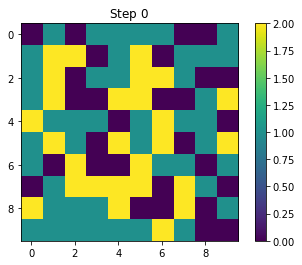

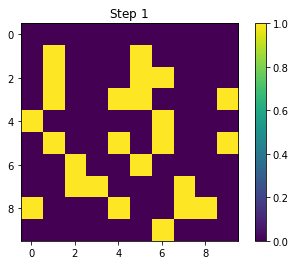

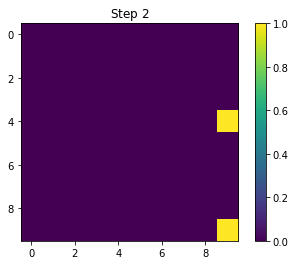

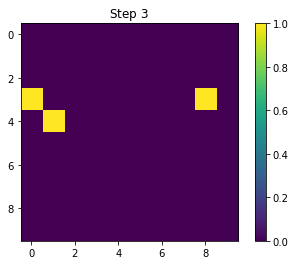

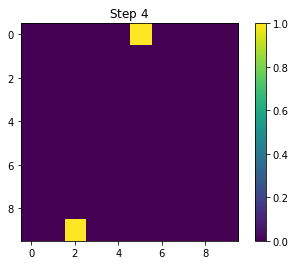

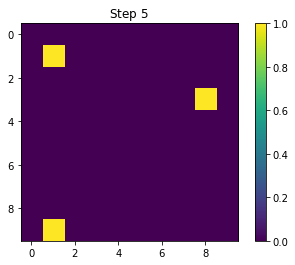

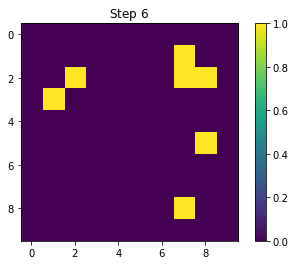

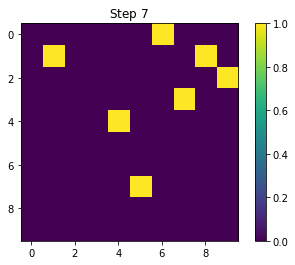

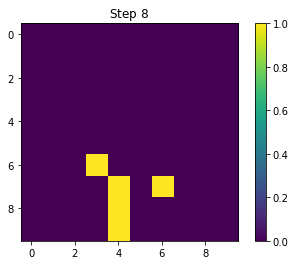

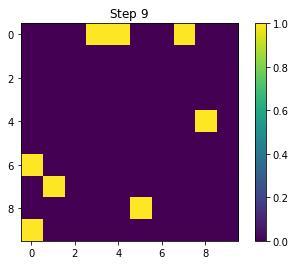

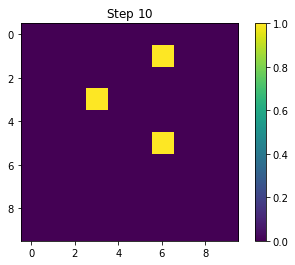

In [53]:
test_world = np.round(2 * np.random.rand(10,10))
f = 0.00025
p = 0.05
fire_update(test_world,10,f,p)

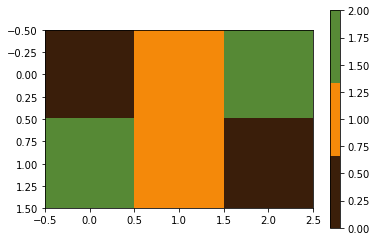

In [55]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0.23, 0.12, 0.04), (0.96, 0.54, 0.04), (0.34, 0.54, 0.21)] 
cmap_name = 'forest'
forest = LinearSegmentedColormap.from_list(cmap_name, colors, N=3)

hi = np.reshape(np.array([0,1,2,2,1,0]),(2,3))

plt.imshow(hi,cmap=forest,vmin=0, vmax=2)
plt.colorbar()